In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## **Brain Cancer MRI DATASET ANASLYSIS**


---





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# count the number of images in the respective classes 0-brain tumor  1-healthy
ROOT_DIR="/content/drive/MyDrive/Datasets/Brain_cancer/BrainTumor_LargeDataset"
os.chdir(ROOT_DIR)
number_of_images={}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
    

number_of_images

{'Brain Tumor': 38, 'Healthy': 32, 'train': 2, 'validation': 2, 'test': 2}

In [ ]:
# we will split the data such as we have 70% for training, 
# 15% for validation, and 15% for testing

def datafolder(p,split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
        number_of_images={}
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)), 
                                    size=math.floor(split*number_of_images[dir]),replace=False):
                origin=os.path.join(ROOT_DIR,dir,img)
                destination=os.path.join("./"+p,dir)
                shutil.copy(origin,destination)
                os.remove(origin)
    else:
        print(f"{p}folder already exists")
        
        

In [ ]:
datafolder("train",0.7)

IsADirectoryError: ignored

In [ ]:
datafolder("validation",0.5)

IsADirectoryError: ignored

In [ ]:
datafolder("test",0.9)

IsADirectoryError: ignored

### **Model Building**

In [ ]:
import tensorflow 
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,Dense,BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [ ]:
model=Sequential()

model.add(Conv2D(filters=16 , kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3) ))

model.add(Conv2D(filters=36 , kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128 , kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)      

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
def preprocessingImages1(path):
    

    '''
    input : Path
    output : Pre processed images
    '''
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True) #data augmentation
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    return image
    

In [ ]:
train_path='/content/drive/MyDrive/Datasets/Brain_cancer/BrainTumor_LargeDataset/train'
train_data=preprocessingImages1(train_path)

Found 3219 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
    

    '''
    input : Path
    output : Pre processed images
    
    '''
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    return image
    

In [ ]:
test_path='/content/drive/MyDrive/Datasets/Brain_cancer/BrainTumor_LargeDataset/test'
test_data= preprocessingImages2(test_path)

Found 621 images belonging to 2 classes.


In [ ]:
val_path='/content/drive/MyDrive/Datasets/Brain_cancer/BrainTumor_LargeDataset/validation'
val_data= preprocessingImages2(val_path)

Found 690 images belonging to 2 classes.


In [ ]:
# early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es=EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')

#model check point

mc=ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd=[es,mc]

## **Model Training**

In [ ]:
hs = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=20, verbose=1, validation_data=val_data, validation_steps=16, callbacks=cd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.7969
Epoch 1: val_accuracy improved from -inf to 0.83594, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 0.4156 - accuracy: 0.7969 - val_loss: 0.3746 - val_accuracy: 0.8359
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.8086
Epoch 2: val_accuracy improved from 0.83594 to 0.83984, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 0.4312 - accuracy: 0.8086 - val_loss: 0.3820 - val_accuracy: 0.8398
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.4071 - accuracy: 0.8047
Epoch 3: val_accuracy did not improve from 0.83984
8/8 [==============================] - 7s 841ms/step - loss: 0.4071 - accuracy: 0.8047 - val_loss: 0.4370 - val_accuracy: 0.7832
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.8125
Epoch 4: val_accuracy improve

In [ ]:
# Model graphical interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

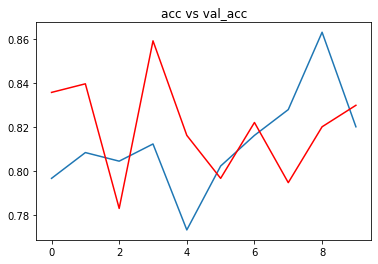

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val_acc")
plt.show()

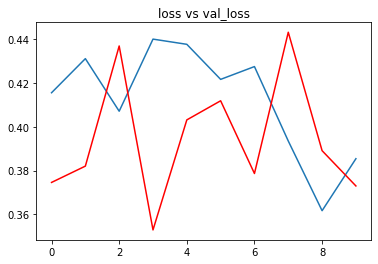

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val_loss")
plt.show()

In [ ]:
# Model Accuracy

from keras.models import load_model

model = load_model("./bestmodel.h5")

## **Model Accuracy**

In [ ]:
acc=model.evaluate_generator(test_data)[1]

print(f"the accuracy of the model is {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


the accuracy of the model is 85.50724387168884 %


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

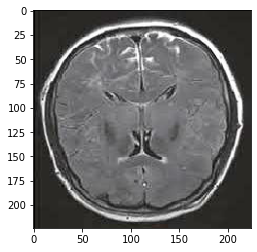

the MRI is not having a Tumor


In [ ]:
path="/content/drive/MyDrive/Datasets/Brain_cancer/BrainTumor_LargeDataset/Healthy/Not Cancer  (1454).jpg"
img=load_img(path, target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr=np.expand_dims(input_arr, axis=0)


pred=(model.predict(input_arr)[0][0]> 0.5).astype("int32")

pred
if pred==0:
    print("the MRI is having a Tumor")
else:
    print("the MRI is not having a Tumor")
